# 1x2 Maze
Our simplest maze model.

In [14]:
import numpy as np
from numpy.random import random_integers as rand
import pyquil
from pyquil.quil import Program
from pyquil.api import QVMConnection
from pyquil.gates import *
from scipy import linalg

qvm = QVMConnection()

In [34]:
def createToffoli():
    identity = np.identity(8)
    identity[[6],[6]] = 0
    identity[[6],[7]] = 1
    identity[[7],[7]] = 0
    identity[[7],[6]] = 1
    return identity

def inverseToffoli():
    identity = np.identity(8)
    identity[[0],[0]] = 0
    identity[[0],[1]] = 1
    identity[[1],[1]] = 0
    identity[[1],[0]] = 1
    return identity

def controlSWAPdef():
    identity = np.identity(8)
    identity[[5],[5]] = 0
    identity[[5],[6]] = 1
    identity[[6],[6]] = 0
    identity[[6],[5]] = 1
    return identity

def controlHadamard():
    identity = np.identity(4)
    identity[[2],[2]] = 1/np.sqrt(2)
    identity[[2],[3]] = 1/np.sqrt(2)
    identity[[3],[2]] = 1/np.sqrt(2)
    identity[[3],[3]] = -1/np.sqrt(2)
    return identity

def quantumRandomWalk(program):
    qvm = QVMConnection()
    program.inst(('Toffoli', 5,3,0))
 
    program.inst(('invToffoli', 5,3,0))
   
    program.inst(('Toffoli', 6,4,1))
 
    program.inst(('invToffoli', 6,4,1))

    program.inst(('Toffoli', 7,6,5))
 #   print(qvm.wavefunction(program))
    program.inst(('Toffoli', 8,7,2))
    print("After Toffoli",qvm.wavefunction(program))
    program.inst(('controlSWAP', 3,4,8))
    print("After CSWAP",qvm.wavefunction(program))
    program.inst(('Toffoli', 8,7,2))
    
    program.inst(('Toffoli', 7,6,5))
    
    program.inst(('invToffoli', 6,4,1))
    
    program.inst(('Toffoli', 6,4,1))
    
    program.inst(('invToffoli', 5,3,0))
    
    program.inst(('Toffoli', 5,3,0))
    print("After Toffoli", qvm.wavefunction(program))
    program.inst(('controlH', 4,3))
    print("End",qvm.wavefunction(program))
    return(program)

def quantumRandomWalk_nQubits(program,n):
        i=0
        Gx = i
        Gy = n+i
        A = 2*n
        Psi_x = 2*n+1+i
        Psi_y = 3*n+1+i
        ancilla1 = 4*n+1+i
        ancilla2 = 5*n+1+i
        ancilla3 = 6*n+1+i
        ancilla4  = 7*n+1+i
        
        program.inst(('Toffoli', Gx, Psi_x, ancilla1 ))
        
        program.inst(('invToffoli', Gx, Psi_x, ancilla1))
        
        program.inst(('Toffoli', Gy, Psi_y, ancilla2))
        
        program.inst(('invToffoli', Gy, Psi_y, ancilla2))
        
        program.inst(('Toffoli', ancilla1, ancilla2, ancilla3))
        
        program.inst(('Toffoli', A, ancilla3, ancilla4))

        program.inst(('controlSWAP', ancilla4, Psi_x, Psi_y))
        
        program.inst(('Toffoli', A, ancilla3, ancilla4))
        
        program.inst(('Toffoli', ancilla1, ancilla2, ancilla3))
        
        program.inst(('invToffoli', Gy, Psi_y, ancilla2))
        
        program.inst(('Toffoli', Gy, Psi_y, ancilla2))
        
        program.inst(('invToffoli', i, Psi_x, ancilla1))
        
        program.inst(('Toffoli', i, Psi_x, ancilla1))
        
        program.inst(('controlH', Psi_x, Psi_y))
        
        return(program)
    
def quantumRandomWalk_badQubits(program):
    
    program.inst(('Toffoli', 0,5,17))
    program.inst(('invToffoli', 0,5,17))
    
    program.inst(('Toffoli', 1,4,12))
    program.inst(('invToffoli', 1,4,12))
    
    program.inst(('Toffoli', 17,12,7))
    program.inst(('Toffoli', 6,7,8))
    
    program.inst(('controlSWAP', 8,4,5))
    
    program.inst(('Toffoli', 6,7,8))
    program.inst(('Toffoli', 17,12,7))
    
    program.inst(('invToffoli', 1,4,12))
    program.inst(('Toffoli', 1,4,12))
    
    program.inst(('invToffoli', 0,5,17))
    program.inst(('Toffoli', 0,5,17))
    
    program.inst(('controlH', 5,4))
    
    return(program)
    

def quantumRandomWalk_2QubitMaze(program):
    # 3 -> 10
    # 2 

    program.inst(('Toffoli', 0,3,5))
    program.inst(('invToffoli', 0,3,5))
    
    program.inst(('Toffoli', 1,4,6))
    program.inst(('invToffoli', 1,4,6))
    
    program.inst(('Toffoli', 5,6,7))
    program.inst(('Toffoli', 2,7,8))
    
    program.inst(('controlSWAP', 8,4,3))
    
    program.inst(('Toffoli', 2,7,8))
    program.inst(('Toffoli', 5,6,7))
    
    program.inst(('invToffoli', 1,4,6))
    program.inst(('Toffoli', 1,4,6))
    
    program.inst(('invToffoli', 0,3,5))
    program.inst(('Toffoli', 0,3,5))
    
    program.inst(('controlH', 3,4))
    
    return(program)

def defineGates(prog):
    controlH = controlHadamard()
    prog.defgate('controlH', controlH)

    controlSWAPgate = controlSWAPdef() 
    prog.defgate('controlSWAP', controlSWAPgate)

    invToffoli = inverseToffoli()
    prog.defgate('invToffoli', invToffoli)

    Toffoli =  createToffoli()
    prog.defgate('Toffoli', Toffoli)
    
    return(prog)


def initialise(prog):
    init_gate = np.identity(2**3)
    for i in [2,3,4,5]:
        init_gate[i,i] = 0.
    init_gate[2,3] = 1.
    init_gate[3,2] = 1.
    init_gate[4,5] = 1.
    init_gate[5,4] = 1.


    prog.defgate("INIT", init_gate)
    prog += H(0)
    prog += H(1) 
    prog.inst(("INIT",0,1,6))
    
    return prog
    #results = qvm.run(prog,[0,1,2],1)
    #print(results)

In [35]:
prog = Program()
prog = defineGates(prog)
prog = initialise(prog)

print(qvm.wavefunction(prog))
for i in range(3):
    #Start at room 1 -> Look to get to room 0
   # prog += H(3)
    prog += H(4)
    prog = quantumRandomWalk_badQubits(prog)
#prog.measure(3,3)
#print(prog)

#output = qvm.run(prog, [3], trials = 10000)
#print(output)
#print(np.sum(output))

(0.5+0j)|000> + (0.5+0j)|011> + (0.5+0j)|101> + (0.5+0j)|110>


## Doing State Tomography

In [36]:
from grove.tomography.state_tomography import do_state_tomography
from grove.tomography.utils import notebook_mode
from pyquil.api import QPUConnection, get_devices, Job
import json
from mock import MagicMock
from __future__ import print_function
import matplotlib.pyplot as plt

qubits = [5]
qvm = QVMConnection()
NUM_SAMPLES=2000
# QPU
online_devices = [d for d in get_devices() if d.is_online()]
if online_devices:
    d = online_devices[0]
    qpu = QPUConnection(d.name)
    print("Found online device {}, making QPUConnection".format(d.name))
else:
    qpu = QVMConnection()
    print("Could not find online device, defaulting to QVM")

Found online device 19Q-Acorn, making QPUConnection


/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/ipykernel_launcher.py:13: DeprecationWarning: 
return the following:

    get_devices()
    # {'19Q-Acorn': <Device 19Q-Acorn online>, '8Q-Agave': <Device 8Q-Agave offline>}
    acorn = get_devices()['19Q-Acorn']

To use this Dict return type now, you may optionally pass the flag get_devices(as_dict=True). This
will become the default behavior in a future pyQuil release.

  del sys.path[0]


In [41]:
#Use for testing purposes only
acorn = get_devices(as_dict=True)['19Q-Acorn']
qpu = QVMConnection(acorn)

In [42]:
%%time
print("Running state tomography on the QPU...")
state_tomography_qpu, _, _ = do_state_tomography(prog, NUM_SAMPLES, qpu, qubits)
print("State tomography completed.")
print("Running state tomography on the QVM for reference...")
state_tomography_qvm, _, _ = do_state_tomography(prog, NUM_SAMPLES, qvm, qubits)
print("State tomography completed.")

  0%|          | 0/2 [00:00<?, ?it/s]

Running state tomography on the QPU...


  0%|          | 0/2 [00:00<?, ?it/s]

job WlZgQfKunjgjBDhC is currently running


 50%|█████     | 1/2 [00:01<00:01,  1.94s/it]

job dzYaPxSOXbARhGDC is currently running


  0%|          | 0/4 [00:00<?, ?it/s]


QVMError: There is no primary method for the generic function
  #<STANDARD-GENERIC-FUNCTION QVM:TRANSITION (27)>
when called with arguments
  (#<QVM-APP::PROFILED-NOISY-QVM {100A64B363}>
   #<CL-QUIL:UNRESOLVED-APPLICATION {100A5BEE43}>).
See also:
  The ANSI Standard, Section 7.6.6.2

The QVM returned the above error. This could be due to a bug in the server or a
bug in your code. If you suspect this to be a bug in pyQuil or Rigetti Forest,
then please describe the problem in a GitHub issue at:
    https://github.com/rigetticomputing/pyquil/issues

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[ -3.37625744e-08+0.j          -1.74999680e-02+0.00750016j]
 [ -1.74999680e-02-0.00750016j   1.00000015e+00+0.j        ]]
Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[ 0.49693875 -0.5       ]
 [-0.5         0.50306125]]


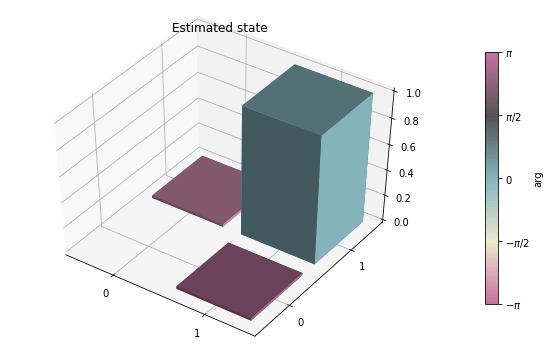

In [29]:
print(state_tomography_qvm.rho_est)
state_fidelity = state_tomography_qpu.fidelity(state_tomography_qvm.rho_est)

print(state_tomography_qpu.rho_est)
qpu_plot = state_tomography_qpu.plot()
qpu_plot.text(0.35, 0.9, r'$Fidelity={:1.1f}\%$'.format(state_fidelity*100), size=20)
state_tomography_qvm.plot()